In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
mnist_dataset = tf.keras.datasets.mnist.load_data()
type(mnist_dataset)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


tuple

In [3]:
((x_train, y_train ), (x_test, y_test)) = mnist_dataset
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

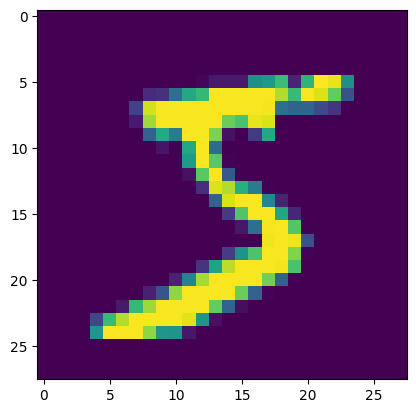

In [4]:
plt.imshow(x_train[0])

In [8]:
x_train_scaled = x_train / 255

In [21]:
fully_connected_model = tf.keras.Sequential([
    ## INPUT LAYER -  va fi intotdeauna la fel in functie de tipul datelor de intrare
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100, activation="relu"),


    ## OUTPUT Layer - va fi intotdeauna la fel in functie de cum trebuie sa arate rezultatul
    tf.keras.layers.Dense(10, activation="softmax")

])
fully_connected_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
model_history = fully_connected_model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8584 - loss: 0.5021 - val_accuracy: 0.9505 - val_loss: 0.1710
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9559 - loss: 0.1498 - val_accuracy: 0.9571 - val_loss: 0.1410
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9688 - loss: 0.1007 - val_accuracy: 0.9665 - val_loss: 0.1118
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9783 - loss: 0.0712 - val_accuracy: 0.9682 - val_loss: 0.1053
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9825 - loss: 0.0583 - val_accuracy: 0.9693 - val_loss: 0.1005
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9869 - loss: 0.0436 - val_accuracy: 0.9701 - val_loss: 0.0997
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9896 - loss: 0.0355 - val_accuracy: 0.9719 - val_loss: 0.0966
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0.0263 -

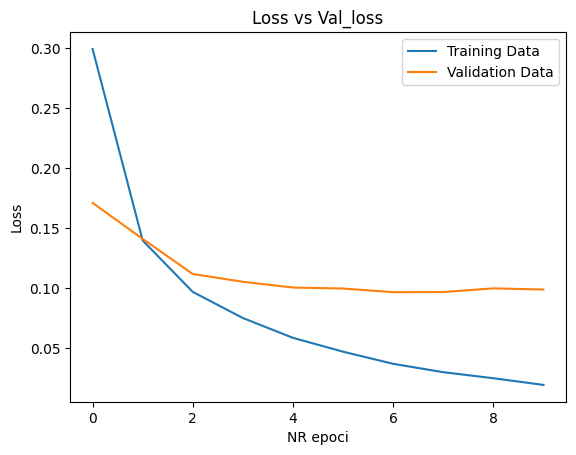

In [24]:
fully_history = model_history.history
loss = fully_history['loss']
plt.plot(loss)

val_loss = fully_history['val_loss']
plt.plot(val_loss)

plt.title("Loss vs Val_loss")


plt.xlabel("NR epoci")
plt.ylabel("Loss")
plt.legend(["Training Data", "Validation Data"])

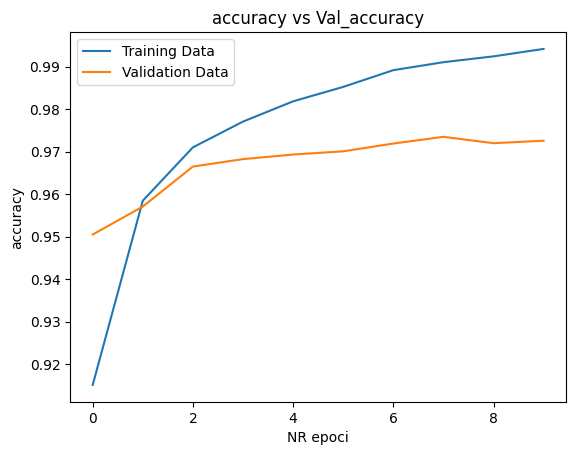

In [25]:
fully_history = model_history.history
accuracy = fully_history['accuracy']
plt.plot(accuracy)

val_accuracy = fully_history['val_accuracy']
plt.plot(val_accuracy)

plt.title("accuracy vs Val_accuracy")


plt.xlabel("NR epoci")
plt.ylabel("accuracy")
plt.legend(["Training Data", "Validation Data"])

In [29]:
x_train_scaled.shape

(60000, 28, 28)

In [32]:
x_train_scaled_extended = np.expand_dims(x_train_scaled, axis=-1)
x_train_scaled_extended.shape

(60000, 28, 28, 1)

In [34]:
cnn_model = tf.keras.Sequential([

    # Un fel de preprocesare

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    ## INPUT LAYER -  va fi intotdeauna la fel in functie de tipul datelor de intrare
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100, activation="relu"),


    ## OUTPUT Layer - va fi intotdeauna la fel in functie de cum trebuie sa arate rezultatul
    tf.keras.layers.Dense(10, activation="softmax")

])
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
cnn_model_history = cnn_model.fit(x_train_scaled_extended, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8979 - loss: 0.3277 - val_accuracy: 0.9762 - val_loss: 0.0761
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9830 - loss: 0.0534 - val_accuracy: 0.9868 - val_loss: 0.0446
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9900 - loss: 0.0305 - val_accuracy: 0.9881 - val_loss: 0.0430
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9924 - loss: 0.0223 - val_accuracy: 0.9886 - val_loss: 0.0400
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9944 - loss: 0.0163 - val_accuracy: 0.9892 - val_loss: 0.0396
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9961 - loss: 0.0118 - val_accuracy: 0.9892 - val_loss: 0.0420
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9962 - loss: 0.0105 - val_accuracy: 0.9893 - val_loss: 0.0444
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9975 -

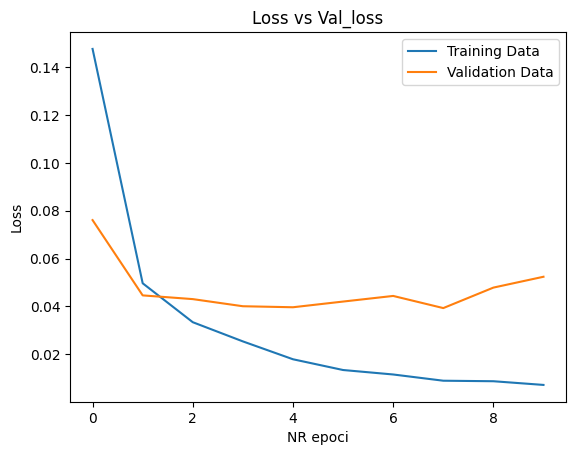

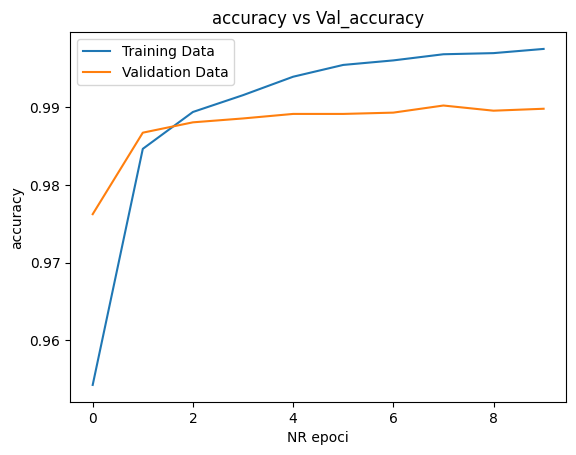

In [37]:
fully_history = cnn_model_history.history
loss = fully_history['loss']
plt.plot(loss)

val_loss = fully_history['val_loss']
plt.plot(val_loss)

plt.title("Loss vs Val_loss")


plt.xlabel("NR epoci")
plt.ylabel("Loss")
plt.legend(["Training Data", "Validation Data"])
plt.show()

fully_history = cnn_model_history.history
accuracy = fully_history['accuracy']
plt.plot(accuracy)

val_accuracy = fully_history['val_accuracy']
plt.plot(val_accuracy)

plt.title("accuracy vs Val_accuracy")


plt.xlabel("NR epoci")
plt.ylabel("accuracy")
plt.legend(["Training Data", "Validation Data"])
plt.show()